In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import os
import seaborn as sns
import category_encoders as ce

from sklearn.preprocessing import MinMaxScaler, Imputer

In [2]:
print('\n'.join(os.listdir("data")))

bureau_balance.csv
test_raw.csv
application_train.csv
train_raw.csv
new_train_raw.csv
bureau.csv
HomeCredit_columns_description.csv
credit_card_balance.csv
Train_Eng.csv
installments_payments.csv
POS_CASH_balance.csv
sample_submission.csv
previous_application.csv
Test_Eng.csv
new_test_raw.csv
application_test.csv


In [3]:
train_raw = pd.read_csv('data/new_train_raw.csv')
test_raw = pd.read_csv('data/new_test_raw.csv')

In [26]:
application_train = pd.read_csv('data/application_train.csv')
application_test = pd.read_csv('data/application_test.csv')

In [4]:
print(train_raw.shape)
print(test_raw.shape)
train_raw.describe()

(307511, 910)
(48744, 909)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,client_installments_AMT_PAYMENT_min_sum,client_installments_AMT_INSTALMENT_min_sum,client_installments_AMT_PAYMENT_sum_max,client_installments_AMT_INSTALMENT_sum_max,client_installments_AMT_PAYMENT_mean_sum,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum
count,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,...,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05,2.916430e+05
mean,278180.518577,0.080729,0.080729,0.080729,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,...,2.867948e+05,4.040328e+05,3.995838e+05,3.882193e+05,6.786865e+05,6.724159e+05,3.061021e+06,3.100218e+06,1.517517e+07,1.540802e+07
std,102790.175348,0.008417,0.014907,0.005953,0.001675,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,...,3.944197e+05,5.197125e+05,5.142817e+05,4.684538e+05,9.162773e+05,8.800911e+05,6.551933e+06,6.607573e+06,3.392876e+07,3.439291e+07
min,100002.000000,0.054783,0.000000,0.072437,0.079616,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,189145.500000,0.083459,0.069993,0.072437,0.079616,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,...,6.173305e+04,9.587241e+04,9.684225e+04,9.970971e+04,1.308395e+05,1.346728e+05,1.826104e+05,1.838517e+05,1.132009e+06,1.160750e+06
50%,278202.000000,0.083459,0.069993,0.085002,0.079616,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,...,1.508296e+05,2.160097e+05,1.931552e+05,1.995731e+05,3.186692e+05,3.283722e+05,5.457494e+05,5.526772e+05,3.539287e+06,3.662790e+06
75%,367142.500000,0.083459,0.101419,0.085002,0.083249,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,...,3.450571e+05,4.948028e+05,4.939762e+05,4.983746e+05,8.331451e+05,8.432570e+05,2.367600e+06,2.416336e+06,1.401902e+07,1.426076e+07
max,456255.000000,0.083459,0.101419,0.085002,0.083249,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,...,6.829794e+06,8.280314e+06,1.934759e+07,1.934759e+07,2.553705e+07,2.327473e+07,2.351041e+08,2.351041e+08,3.908885e+09,3.923054e+09


In [5]:
print("\n".join(sorted(train_raw.columns)))

AMT_ANNUITY
AMT_CREDIT
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
APARTMENTS_AVG
APARTMENTS_MEDI
APARTMENTS_MODE
BASEMENTAREA_AVG
BASEMENTAREA_MEDI
BASEMENTAREA_MODE
CNT_CHILDREN
CNT_FAM_MEMBERS
CODE_GENDER
COMMONAREA_AVG
COMMONAREA_MEDI
COMMONAREA_MODE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
DEF_30_CNT_SOCIAL_CIRCLE
DEF_60_CNT_SOCIAL_CIRCLE
ELEVATORS_AVG
ELEVATORS_MEDI
ELEVATORS_MODE
EMERGENCYSTATE_MODE
ENTRANCES_AVG
ENTRANCES_MEDI
ENTRANCES_MODE
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_CONT_MOBILE
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
F

In [18]:
print("\n".join(sorted(train_raw.columns))) #Output from this one is old tran_raw

AMT_ANNUITY
AMT_GOODS_PRICE
AMT_INCOME_TOTAL
AMT_REQ_CREDIT_BUREAU_DAY
AMT_REQ_CREDIT_BUREAU_HOUR
AMT_REQ_CREDIT_BUREAU_MON
AMT_REQ_CREDIT_BUREAU_QRT
AMT_REQ_CREDIT_BUREAU_WEEK
AMT_REQ_CREDIT_BUREAU_YEAR
BASEMENTAREA_MEDI
CNT_CHILDREN
CODE_GENDER
COMMONAREA_MODE
DAYS_BIRTH
DAYS_EMPLOYED
DAYS_ID_PUBLISH
DAYS_LAST_PHONE_CHANGE
DAYS_REGISTRATION
DEF_30_CNT_SOCIAL_CIRCLE
ELEVATORS_MODE
EMERGENCYSTATE_MODE
ENTRANCES_AVG
EXT_SOURCE_1
EXT_SOURCE_2
EXT_SOURCE_3
FLAG_CONT_MOBILE
FLAG_DOCUMENT_10
FLAG_DOCUMENT_11
FLAG_DOCUMENT_12
FLAG_DOCUMENT_13
FLAG_DOCUMENT_14
FLAG_DOCUMENT_15
FLAG_DOCUMENT_16
FLAG_DOCUMENT_17
FLAG_DOCUMENT_18
FLAG_DOCUMENT_19
FLAG_DOCUMENT_2
FLAG_DOCUMENT_20
FLAG_DOCUMENT_21
FLAG_DOCUMENT_3
FLAG_DOCUMENT_4
FLAG_DOCUMENT_5
FLAG_DOCUMENT_6
FLAG_DOCUMENT_7
FLAG_DOCUMENT_8
FLAG_DOCUMENT_9
FLAG_EMAIL
FLAG_EMP_PHONE
FLAG_MOBIL
FLAG_OWN_CAR
FLAG_OWN_REALTY
FLAG_PHONE
FLAG_WORK_PHONE
FLOORSMAX_MODE
FLOORSMIN_MEDI
FONDKAPREMONT_MODE
HOUR_APPR_PROCESS_START
HOUSETYPE_MODE
LANDAREA_MED

# Deals with anomalies

In [6]:
print('anomalies count =', len(train_raw[train_raw['DAYS_EMPLOYED'] == 365243.000000]))

anomalies count = 55374


There are 9274 anomalies in the test data out of 48744 entries


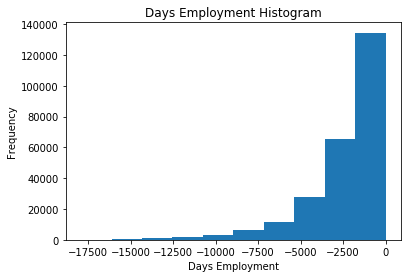

In [7]:
# Create an anomalous flag column
train_raw['DAYS_EMPLOYED_ANOM'] = train_raw["DAYS_EMPLOYED"] == 365243

# Replace the anomalous values with nan
train_raw['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

train_raw['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

#redo with test
test_raw['DAYS_EMPLOYED_ANOM'] = test_raw["DAYS_EMPLOYED"] == 365243
test_raw["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('There are %d anomalies in the test data out of %d entries' % (test_raw["DAYS_EMPLOYED_ANOM"].sum(), len(test_raw)))

# Adding Knowledge

In [8]:
# train_eng = train_raw.copy()
# test_eng = test_raw.copy()


train_raw['CREDIT_INCOME_PERCENT'] = train_raw['AMT_CREDIT'] / train_raw['AMT_INCOME_TOTAL']
train_raw['CREDIT_TERM'] = train_raw['AMT_ANNUITY'] / train_raw['AMT_CREDIT']
train_raw['ANNUITY_INCOME_PERCENT'] = train_raw['AMT_ANNUITY'] / train_raw['AMT_INCOME_TOTAL']
train_raw['DAYS_EMPLOYED_PERCENT'] = train_raw['DAYS_EMPLOYED'] / train_raw['DAYS_BIRTH']

test_raw['CREDIT_INCOME_PERCENT'] = test_raw['AMT_CREDIT'] / test_raw['AMT_INCOME_TOTAL']
test_raw['CREDIT_TERM'] = test_raw['AMT_ANNUITY'] / test_raw['AMT_CREDIT']
test_raw['ANNUITY_INCOME_PERCENT'] = test_raw['AMT_ANNUITY'] / test_raw['AMT_INCOME_TOTAL']
test_raw['DAYS_EMPLOYED_PERCENT'] = test_raw['DAYS_EMPLOYED'] / test_raw['DAYS_BIRTH']

# train_eng = train_eng.merge(application_train[['CREDIT_INCOME_PERCENT', 'CREDIT_TERM', 'SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')
# test_eng = test_eng.merge(application_test[['CREDIT_INCOME_PERCENT', 'CREDIT_TERM', 'SK_ID_CURR']], on = 'SK_ID_CURR', how = 'left')
train_raw

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,client_installments_AMT_INSTALMENT_mean_sum,client_installments_AMT_INSTALMENT_max_sum,client_installments_AMT_PAYMENT_max_sum,client_installments_AMT_PAYMENT_sum_sum,client_installments_AMT_INSTALMENT_sum_sum,DAYS_EMPLOYED_ANOM,CREDIT_INCOME_PERCENT,CREDIT_TERM,ANNUITY_INCOME_PERCENT,DAYS_EMPLOYED_PERCENT
0,100002,True,0.083459,0.101419,0.085002,0.079616,0,202500.000,406597.5,24700.5,...,219625.690,1.008781e+06,1.008781e+06,4.172888e+06,4.172888e+06,False,2.007889,0.060749,0.121978,0.067329
1,100003,False,0.083459,0.069993,0.085002,0.083249,0,270000.000,1293502.5,35698.5,...,1618864.600,4.394102e+06,4.394102e+06,1.134881e+07,1.134881e+07,False,4.790750,0.027598,0.132217,0.070862
2,100004,False,0.054783,0.101419,0.072437,0.079616,0,67500.000,135000.0,6750.0,...,21288.465,3.172190e+04,3.172190e+04,6.386539e+04,6.386539e+04,False,2.000000,0.050000,0.100000,0.011814
3,100006,False,0.083459,0.069993,0.085002,0.079616,0,135000.000,312682.5,29686.5,...,1007153.400,1.057860e+06,1.057860e+06,3.719995e+06,3.719995e+06,False,2.316167,0.094941,0.219900,0.159905
4,100007,False,0.083459,0.101419,0.085002,0.079616,0,121500.000,513000.0,21865.5,...,835985.300,8.367034e+05,8.367034e+05,1.139621e+07,1.179154e+07,False,4.222222,0.042623,0.179963,0.152418
5,100008,False,0.083459,0.101419,0.085002,0.079616,0,99000.000,490495.5,27517.5,...,969603.750,3.818306e+06,3.818306e+06,8.286294e+06,8.418142e+06,False,4.954500,0.056101,0.277955,0.093737
6,100009,False,0.083459,0.069993,0.072437,0.079616,1,171000.000,1560726.0,41301.0,...,487995.120,4.880686e+05,4.880686e+05,3.868092e+06,3.868092e+06,False,9.127053,0.026463,0.241526,0.227174
7,100010,False,0.083459,0.101419,0.072437,0.079616,0,360000.000,1530000.0,42075.0,...,274492.100,2.746341e+05,2.746341e+05,2.744921e+06,2.744921e+06,False,4.250000,0.027500,0.116875,0.023820
8,100011,False,0.083459,0.069993,0.085002,0.079616,0,112500.000,1019610.0,33826.5,...,1764843.000,4.939228e+06,4.939228e+06,6.498411e+07,7.433092e+07,True,9.063200,0.033176,0.300680,NaN
9,100012,False,0.054783,0.101419,0.085002,0.079616,0,135000.000,405000.0,20250.0,...,460056.160,1.270328e+06,1.393598e+06,9.366193e+06,8.934905e+06,False,3.000000,0.050000,0.150000,0.139540


In [10]:
print(train_raw.shape)
print(test_raw.shape)

(307511, 915)
(48744, 914)


## Let's see corelation now

In [11]:
# Find correlations with the target and sort
correlations = train_raw.corr()['TARGET'].sort_values()

# Display correlations
print('Most Positive Correlations:\n', correlations.tail(15))
print('\nMost Negative Correlations:\n', correlations.head(15))

Most Positive Correlations:
 client_credit_AMT_TOTAL_RECEIVABLE_mean_max         0.086932
client_credit_AMT_BALANCE_mean_min                  0.086997
client_credit_AMT_BALANCE_mean_mean                 0.087177
client_credit_AMT_BALANCE_mean_max                  0.087617
client_bureau_balance_MONTHS_BALANCE_min_mean       0.089038
bureau_DAYS_CREDIT_mean                             0.089729
client_credit_CNT_DRAWINGS_CURRENT_max_min          0.100648
client_credit_CNT_DRAWINGS_CURRENT_max_mean         0.100921
client_credit_CNT_DRAWINGS_CURRENT_max_max          0.101389
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_min     0.107636
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_mean    0.107713
client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max     0.108340
TARGET                                              1.000000
client_credit_SK_DPD_min_mean                            NaN
client_credit_SK_DPD_min_sum                             NaN
Name: TARGET, dtype: float64

Most Negative Correlations

In [16]:
# Make a new dataframe for polynomial features
poly_features = train_raw[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',\
                                   'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max', 'client_credit_CNT_DRAWINGS_CURRENT_max_max', 'TARGET']]
poly_features_test = test_raw[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',\
                                   'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max', 'client_credit_CNT_DRAWINGS_CURRENT_max_max']]

# imputer for handling missing values
from sklearn.preprocessing import Imputer
imputer = Imputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

# Need to impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Create the polynomial object with specified degree
poly_transformer = PolynomialFeatures(degree = 3)

# Train the polynomial features
poly_transformer.fit(poly_features)

# Transform the features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shape: ', poly_features.shape)

Polynomial Features shape:  (307511, 84)


In [17]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH',\
                                   'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max', 'client_credit_CNT_DRAWINGS_CURRENT_max_max'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max',
 'client_credit_CNT_DRAWINGS_CURRENT_max_max',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_1 client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max',
 'EXT_SOURCE_1 client_credit_CNT_DRAWINGS_CURRENT_max_max',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3']

In [18]:
# Create a dataframe of the features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH',\
                                   'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max', 'client_credit_CNT_DRAWINGS_CURRENT_max_max']))

# Add in the target
poly_features['TARGET'] = poly_target

# Find the correlations with the target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Display most negative and most positive
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
EXT_SOURCE_3                             -0.155892
EXT_SOURCE_1 EXT_SOURCE_3^2              -0.150822
Name: TARGET, dtype: float64
EXT_SOURCE_1 EXT_SOURCE_2 DAYS_BIRTH    0.155891
EXT_SOURCE_2 DAYS_BIRTH                 0.156873
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH    0.181283
TARGET                                  1.000000
1                                            NaN
Name: TARGET, dtype: float64


In [19]:
# Put test features into dataframe
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH',\
                                   'client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max', 'client_credit_CNT_DRAWINGS_CURRENT_max_max']))

# Merge polynomial features into training dataframe
poly_features['SK_ID_CURR'] = train_raw['SK_ID_CURR']
train_raw = train_raw.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Merge polnomial features into testing dataframe
poly_features_test['SK_ID_CURR'] = test_raw['SK_ID_CURR']
test_raw = test_raw.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Align the dataframes
train_raw, test_raw = train_raw.align(test_raw, join = 'inner', axis = 1)

NameError: name 'app_train_poly' is not defined

In [20]:
# Print out the new shapes
print('Training data with polynomial features shape: ', train_raw.shape)
print('Testing data with polynomial features shape:  ', test_raw.shape)

Training data with polynomial features shape:  (307511, 998)
Testing data with polynomial features shape:   (48744, 998)


In [24]:
train_raw['TARGET'] = poly_target

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,DAYS_BIRTH^2 client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max,DAYS_BIRTH^2 client_credit_CNT_DRAWINGS_CURRENT_max_max,DAYS_BIRTH client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max^2,DAYS_BIRTH client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max client_credit_CNT_DRAWINGS_CURRENT_max_max,DAYS_BIRTH client_credit_CNT_DRAWINGS_CURRENT_max_max^2,client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max^3,client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max^2 client_credit_CNT_DRAWINGS_CURRENT_max_max,client_credit_CNT_DRAWINGS_ATM_CURRENT_mean_max client_credit_CNT_DRAWINGS_CURRENT_max_max^2,client_credit_CNT_DRAWINGS_CURRENT_max_max^3,TARGET
0,100002,0.083459,0.101419,0.085002,0.079616,0,202500.000,406597.5,24700.5,351000.0,...,2.441196e+07,2.685316e+08,-703.710781,-7740.818388,-85149.0,0.020286,0.223141,2.454546,27.0,True
1,100003,0.083459,0.069993,0.085002,0.083249,0,270000.000,1293502.5,35698.5,1129500.0,...,7.665415e+07,8.431957e+08,-1246.983538,-13716.818548,-150885.0,0.020286,0.223141,2.454546,27.0,False
2,100004,0.054783,0.101419,0.072437,0.079616,0,67500.000,135000.0,6750.0,135000.0,...,9.893185e+07,1.088250e+09,-1416.644704,-15583.091325,-171414.0,0.020286,0.223141,2.454546,27.0,False
3,100006,0.083459,0.069993,0.085002,0.079616,0,135000.000,312682.5,29686.5,297000.0,...,9.850637e+07,0.000000e+00,-1413.595117,-0.000000,-0.0,0.020286,0.000000,0.000000,0.0,False
4,100007,0.083459,0.101419,0.085002,0.079616,0,121500.000,513000.0,21865.5,513000.0,...,1.083504e+08,1.191854e+09,-1482.545534,-16308.000435,-179388.0,0.020286,0.223141,2.454546,27.0,False
5,100008,0.083459,0.101419,0.085002,0.079616,0,99000.000,490495.5,27517.5,454500.0,...,7.827204e+07,8.609924e+08,-1260.074447,-13860.818551,-152469.0,0.020286,0.223141,2.454546,27.0,False
6,100009,0.083459,0.069993,0.072437,0.079616,1,171000.000,1560726.0,41301.0,1395000.0,...,5.177272e+07,5.694999e+08,-1024.809972,-11272.909392,-124002.0,0.020286,0.223141,2.454546,27.0,False
7,100010,0.083459,0.101419,0.072437,0.079616,0,360000.000,1530000.0,42075.0,1530000.0,...,9.690614e+07,1.065968e+09,-1402.066190,-15422.727684,-169650.0,0.020286,0.223141,2.454546,27.0,False
8,100011,0.083459,0.069993,0.085002,0.079616,0,112500.000,1019610.0,33826.5,913500.0,...,2.183621e+07,1.615879e+09,-58.726079,-4345.729806,-321584.0,0.000158,0.011687,0.864865,64.0,False
9,100012,0.054783,0.101419,0.085002,0.079616,0,135000.000,405000.0,20250.0,405000.0,...,5.709599e+07,6.280559e+08,-1076.206669,-11838.273043,-130221.0,0.020286,0.223141,2.454546,27.0,False


## Just save for now -------------------------------------------- continue here -------------------------------

In [29]:
train_raw.to_csv('data/Train_Eng2.csv', index = False)
test_raw.to_csv('data/Test_Eng2.csv', index = False)

In [30]:
print(train_raw.shape)
print(test_raw.shape)

(307511, 999)
(48744, 998)


# just for fun try with logistic

In [25]:
# Drop the target from the training data
if 'TARGET' in train_raw:
    train = train_raw.drop(columns = ['TARGET'])
else:
    train = train_raw.copy()
    
# Feature names
features = list(train.columns)

# Copy of the testing data
test = test_raw.copy()

# Median imputation of missing values
imputer = Imputer(strategy = 'median')

# Scale each feature to 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit on the training data
imputer.fit(train)

# Transform both training and testing data
train = imputer.transform(train)
test = imputer.transform(test)

# Repeat with the scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

from sklearn.linear_model import LogisticRegression

# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train, train_raw['TARGET'])

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test)[:, 1]

# Submission dataframe
submit = test_raw[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

# Save the submission to a csv file
submit.to_csv('log_reg_All_table_new_FE.csv', index = False)

Training data shape:  (307511, 998)
Testing data shape:  (48744, 998)


/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


# trying to do pca

In [26]:
from sklearn.decomposition import PCA
pca = PCA(n_components=998)
train_PCA = pca.fit_transform(train)
test_PCA = pca.transform(test)

In [27]:
print(train_PCA.shape)
print(test_PCA.shape)

(307511, 998)
(48744, 998)


In [28]:
# Make the model with the specified regularization parameter
log_reg = LogisticRegression(C = 0.0001)

# Train on the training data
log_reg.fit(train_PCA, train_raw['TARGET'])

# Make predictions
# Make sure to select the second column only
log_reg_pred = log_reg.predict_proba(test_PCA)[:, 1]

# Submission dataframe
submit = test_raw[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

# Save the submission to a csv file
submit.to_csv('log_reg_All_table_PCA_new_FE.csv', index = False)

/usr/local/lib/python3.5/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  del sys.path[0]
